## Textual Inversion fine-tuning Stable Diffusion

[Textual inversion](https://arxiv.org/abs/2208.01618) is a method to personalize text2image models like stable diffusion on your own images using just 3-5 examples.
The `textual_inversion.py` script shows how to implement the training procedure and adapt it for stable diffusion.

Here, we'll customize Stable Diffusion by fine-tuning with Molly pictures using an example adapted from Hugging Face.  To do this, we'll utilize some Hugging Face libraries including the [Diffuser's Library](https://huggingface.co/docs/diffusers/index) and [PEFT Libraries](https://huggingface.co/docs/peft/index).  

To start, we'll install some prerequisites and perform some initial setup. 

## Setup

In [3]:
!pip install torch==2.0.1 \
  accelerate==0.24.1 \
  transformers==4.35.2 \
  torchvision \
  ftfy \
  tensorboard \
  Jinja2 \
  ipywidgets

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install git+https://github.com/huggingface/diffusers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-2gv0lh57
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-2gv0lh57
  Resolved https://github.com/huggingface/diffusers to commit 4e54dfe985293df9e6e86828d7a2763d076879f5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [12]:
!pip uninstall xformers -y

In [13]:
!conda install -y xformers -c xformers

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.



## Perform Inference

Next, we can perform inference using our learned embeddings combined with a prompt that contains the learned token 'M*'

In [14]:
from diffusers import StableDiffusionPipeline
import torch

In [16]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [17]:
pipe.load_textual_inversion("./textual_inversion_molly/learned_embeds.bin", token="M*")

In [18]:
prompt = "An oil painting of M*"

image = pipe(prompt, num_inference_steps=50).images[0]
image.save("molly-dog3.png")

  0%|          | 0/50 [00:00<?, ?it/s]

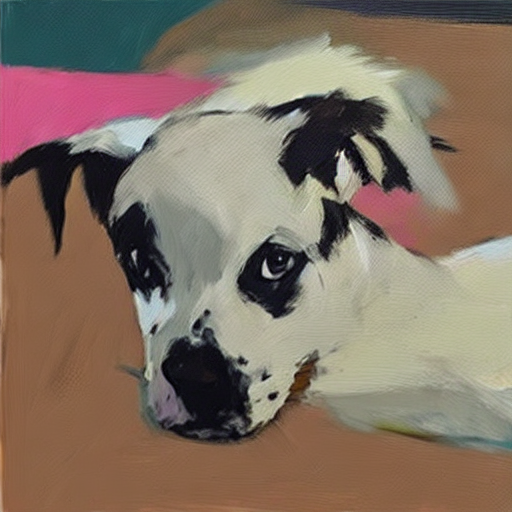

In [19]:
from IPython.display import Image
Image("./molly-dog3.png")

In [14]:
from diffusers import StableDiffusionPipeline
import torch

In [16]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [17]:
pipe.load_textual_inversion("./textual_inversion_molly/learned_embeds.bin", token="M*")

In [18]:
prompt = "An oil painting of M*"

image = pipe(prompt, num_inference_steps=50).images[0]
image.save("molly-dog3.png")

  0%|          | 0/50 [00:00<?, ?it/s]

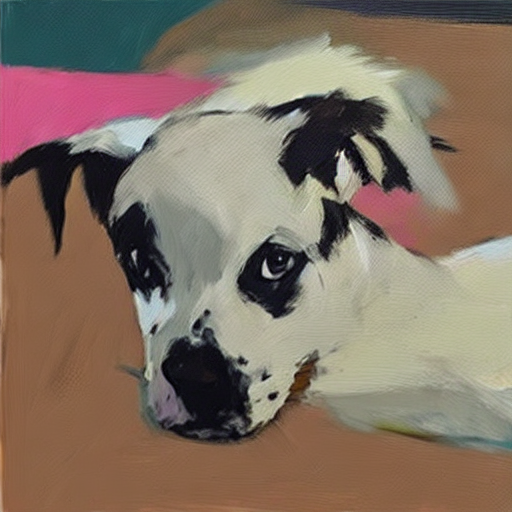

In [19]:
from IPython.display import Image
Image("./molly-dog3.png")